Mean Squared Error: 0.32546341428005837


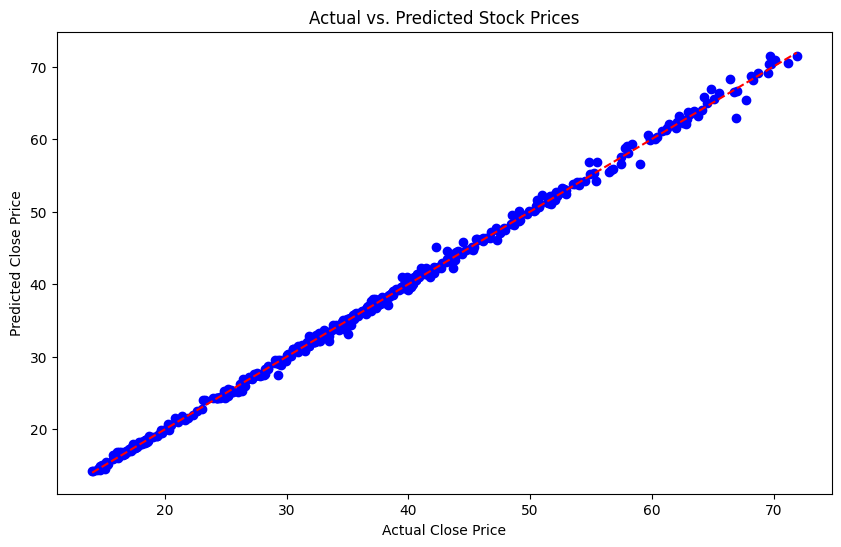

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load stock price dataset
stock_data = pd.read_csv('twitter-stocks.csv')

# Select relevant features (Open, High, Low, Volume) for prediction
features = stock_data[['Open', 'High', 'Low', 'Volume']]
target = stock_data['Close']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize and train RandomForestRegressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate model on testing set
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Plot actual vs. predicted stock prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')
plt.title('Actual vs. Predicted Stock Prices')
plt.show()


In [5]:
# Calculate residuals (difference between predicted and actual values)
residuals = y_test - y_pred

# Get absolute residuals
absolute_residuals = abs(residuals)

# Sort absolute residuals in descending order to find samples with largest errors
sorted_indices = absolute_residuals.argsort()[::-1]

# Display the top 5 samples with largest errors
top_wrong_samples = X_test.iloc[sorted_indices[:5]]
actual_values = y_test.iloc[sorted_indices[:5]]
predicted_values = y_pred[sorted_indices[:5]]

for i, (index, row) in enumerate(top_wrong_samples.iterrows()):
    print(f"Sample {i+1}:")
    print("Features:", row)
    print("Actual Close Price:", actual_values.iloc[i])
    print("Predicted Close Price:", predicted_values[i])
    print()


Sample 1:
Features: Open      6.767000e+01
High      6.779000e+01
Low       6.152350e+01
Volume    2.234615e+07
Name: 1842, dtype: float64
Actual Close Price: 66.949997
Predicted Close Price: 62.93449993999994

Sample 2:
Features: Open      5.216000e+01
High      5.221900e+01
Low       3.838000e+01
Volume    7.700908e+07
Name: 368, dtype: float64
Actual Close Price: 42.27
Predicted Close Price: 45.17900017

Sample 3:
Features: Open      5.620000e+01
High      5.941000e+01
Low       5.545000e+01
Volume    3.897957e+07
Name: 25, dtype: float64
Actual Close Price: 59.0
Predicted Close Price: 56.569900599999976

Sample 4:
Features: Open      6.580000e+01
High      6.925000e+01
Low       6.320000e+01
Volume    7.364918e+07
Name: 1826, dtype: float64
Actual Close Price: 67.769997
Predicted Close Price: 65.45339979999999

Sample 5:
Features: Open      6.945650e+01
High      6.946000e+01
Low       6.459000e+01
Volume    2.246415e+07
Name: 1845, dtype: float64
Actual Close Price: 64.830002
Pred